## IMPORTING ALL NECESSARY LIBRARIES


In [1]:
#import all the necessary libraries that may be need for this project
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib inline
import cartopy.crs as ccrs
from cartopy.feature import NaturalEarthFeature
import xarray as xr
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import time
import warnings
warnings.filterwarnings('ignore')

## IMPORTING DATASETS

In [2]:
global_temp_country = pd.read_csv('GlobalLandTemperaturesByCountry.csv')
global_temp = pd.read_csv("GlobalTemperatures.csv")
#using the xarray library to access a data set from an unconventional source
xr_df = xr.open_dataset('gistemp1200_GHCNv4_ERSSTv5.nc.gz') 


In [3]:
global_temp_country

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland
...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe
577460,2013-08-01,19.759,0.717,Zimbabwe


In [4]:
global_temp_country.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,544811.000000,545550.000000
mean,17.193354,1.019057
std,10.953966,1.201930
min,-37.658000,0.052000
25%,10.025000,0.323000
50%,20.901000,0.571000
75%,25.814000,1.206000
max,38.842000,15.003000


In [5]:
global_temp

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
3187,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
3188,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062
3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063


In [6]:
global_temp.describe

<bound method NDFrame.describe of               dt  LandAverageTemperature  LandAverageTemperatureUncertainty  \
0     1750-01-01                   3.034                              3.574   
1     1750-02-01                   3.083                              3.702   
2     1750-03-01                   5.626                              3.076   
3     1750-04-01                   8.490                              2.451   
4     1750-05-01                  11.573                              2.072   
...          ...                     ...                                ...   
3187  2015-08-01                  14.755                              0.072   
3188  2015-09-01                  12.999                              0.079   
3189  2015-10-01                  10.801                              0.102   
3190  2015-11-01                   7.433                              0.119   
3191  2015-12-01                   5.518                              0.100   

      LandMaxTemp

In [7]:
xr_df

<xarray.Dataset>
Dimensions:      (lat: 90, lon: 180, time: 1726, nv: 2)
Coordinates:
  * lat          (lat) float32 -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
  * lon          (lon) float32 -179.0 -177.0 -175.0 -173.0 ... 175.0 177.0 179.0
  * time         (time) datetime64[ns] 1880-01-15 1880-02-15 ... 2023-10-15
Dimensions without coordinates: nv
Data variables:
    time_bnds    (time, nv) datetime64[ns] ...
    tempanomaly  (time, lat, lon) float32 ...
Attributes:
    title:        GISTEMP Surface Temperature Analysis
    institution:  NASA Goddard Institute for Space Studies
    source:       http://data.giss.nasa.gov/gistemp/
    Conventions:  CF-1.6
    history:      Created 2023-11-13 12:40:03 by SBBX_to_nc 2.0 - ILAND=1200,...

In [8]:
xr_df

<xarray.Dataset>
Dimensions:      (lat: 90, lon: 180, time: 1726, nv: 2)
Coordinates:
  * lat          (lat) float32 -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
  * lon          (lon) float32 -179.0 -177.0 -175.0 -173.0 ... 175.0 177.0 179.0
  * time         (time) datetime64[ns] 1880-01-15 1880-02-15 ... 2023-10-15
Dimensions without coordinates: nv
Data variables:
    time_bnds    (time, nv) datetime64[ns] ...
    tempanomaly  (time, lat, lon) float32 ...
Attributes:
    title:        GISTEMP Surface Temperature Analysis
    institution:  NASA Goddard Institute for Space Studies
    source:       http://data.giss.nasa.gov/gistemp/
    Conventions:  CF-1.6
    history:      Created 2023-11-13 12:40:03 by SBBX_to_nc 2.0 - ILAND=1200,...

## Mapping of Average Temperatures in Countries

In [9]:
#Removing the duplicated countries and countries for which no information about the temperature is avaiable
global_temp_country_clear = global_temp_country[~global_temp_country['Country'].isin(
    ['Denmark', 'Antarctica', 'France', 'Europe', 'Netherlands',
     'United Kingdom', 'Africa', 'South America'])]

# Replace specific country names with more standardized ones
global_temp_country_clear = global_temp_country_clear.replace(
   ['Denmark (Europe)', 'France (Europe)', 'Netherlands (Europe)', 'United Kingdom (Europe)'],
   ['Denmark', 'France', 'Netherlands', 'United Kingdom'])

# Extract unique country names and calculate mean temperature for each country
countries = np.unique(global_temp_country_clear['Country'])
mean_temp = []
for country in countries:
    mean_temp.append(global_temp_country_clear[global_temp_country_clear['Country'] == 
                                               country]['AverageTemperature'].mean())
    
# Create data dictionary for the choropleth map
data = [dict(
        type='choropleth',
        locations=countries,
        z=mean_temp,
        locationmode='country names',
        text=countries,
        marker=dict(
            line=dict(color='rgb(0,0,0)', width=1)),
        colorbar=dict(autotick=True, tickprefix='', title='Average\nTemperature,\n°C')
    )
]

# Define the layout for the choropleth map
layout = dict(
    title='Average land temperature in countries',
    geo=dict(
        showframe=False,
        showocean=True,
        oceancolor='rgb(0,255,255)',
        projection=dict(
            type='orthographic',
            rotation=dict(
                lon=60,
                lat=10),
        ),
        lonaxis=dict(
            showgrid=True,
            gridcolor='rgb(102, 102, 102)'
        ),
        lataxis=dict(
            showgrid=True,
            gridcolor='rgb(102, 102, 102)'
        )
    ),
)

# Create the figure using Plotly and display the world map
fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='worldmap')


## Horizontal Bar

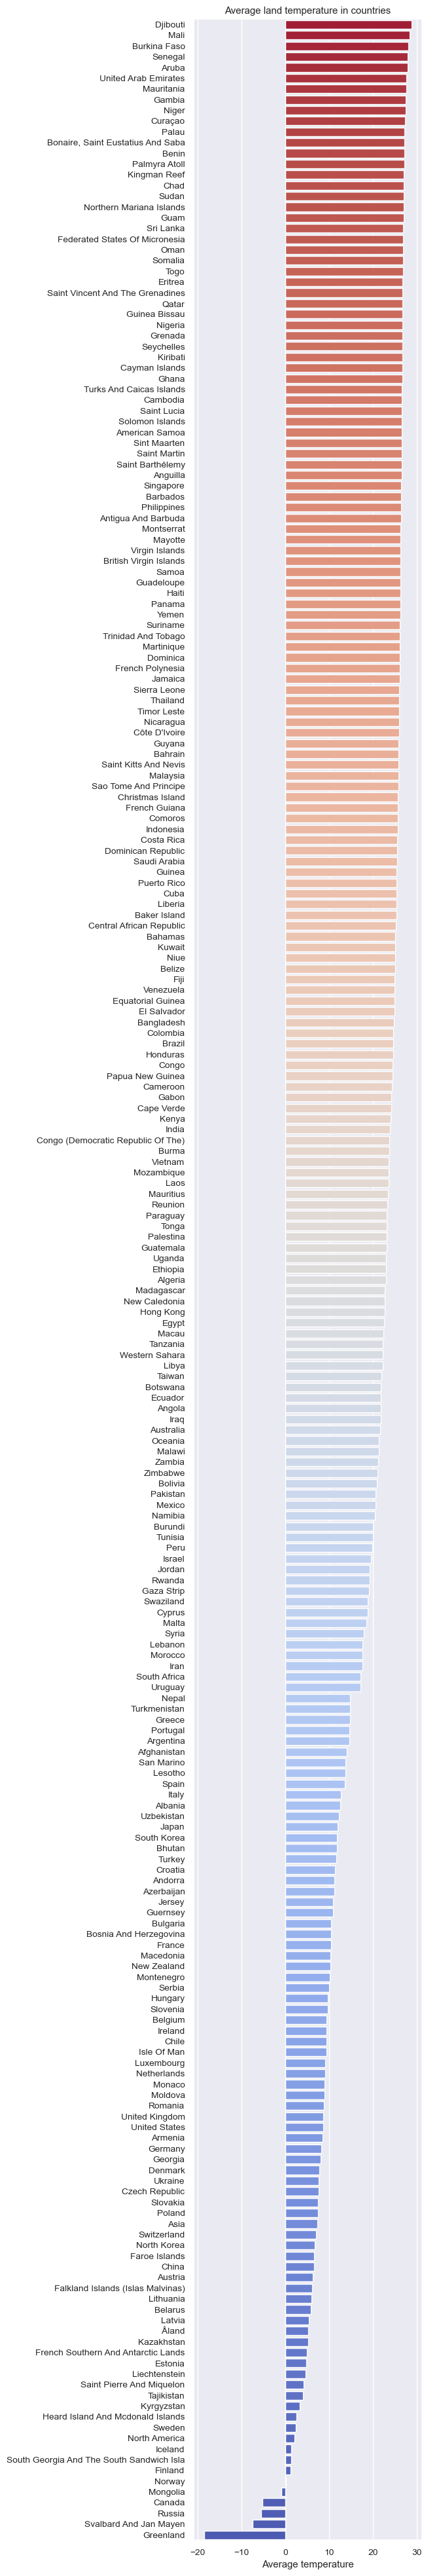

In [10]:
# Sort countries and corresponding mean temperatures in descending order
mean_temp_bar, countries_bar = (list(x) for x in zip(*sorted(zip(mean_temp, countries), reverse=True)))

# Set the font scale for better readability of the plot
sns.set(font_scale=0.9)

# Create a horizontal bar plot using Seaborn
f, ax = plt.subplots(figsize=(4.5, 50))
colors_cw = sns.color_palette('coolwarm', len(countries))  # Define color palette
sns.barplot(x=mean_temp_bar, y=countries_bar, palette=colors_cw[::-1])  # Reverse color palette for better visualization

# Set labels and title for the plot
Text = ax.set(xlabel='Average temperature', title='Average land temperature in countries')


## GLOBAL WARMING RATE BY ANALYZING VARYING TEMPERATURES OVER THE YEARS

## Average Land Temperature

In [11]:
# Extract unique years from the 'dt' column in the global_temp DataFrame
years = np.unique(global_temp['dt'].apply(lambda x: x[:4]))

# Initialize empty lists to store mean temperature and uncertainty values
mean_temp_world = []
mean_temp_world_uncertainty = []

# Calculate mean temperature and uncertainty for each year
for year in years:
    mean_temp_world.append(global_temp[global_temp['dt'].apply(
        lambda x: x[:4]) == year]['LandAverageTemperature'].mean())
    mean_temp_world_uncertainty.append(global_temp[global_temp['dt'].apply(
        lambda x: x[:4]) == year]['LandAverageTemperatureUncertainty'].mean())

# Create traces for the plot using Plotly
trace0 = go.Scatter(
    x=years,
    y=np.array(mean_temp_world) + np.array(mean_temp_world_uncertainty),
    fill=None,
    mode='lines',
    name='Uncertainty top',
    line=dict(
        color='rgb(0, 255, 255)',
    )
)
trace1 = go.Scatter(
    x=years,
    y=np.array(mean_temp_world) - np.array(mean_temp_world_uncertainty),
    fill='tonexty',
    mode='lines',
    name='Uncertainty bot',
    line=dict(
        color='rgb(0, 255, 255)',
    )
)

trace2 = go.Scatter(
    x=years,
    y=mean_temp_world,
    name='Average Temperature',
    line=dict(
        color='rgb(199, 121, 093)',
    )
)

# Combine traces into data list
data = [trace0, trace1, trace2]

# Define layout for the plot
layout = go.Layout(
    xaxis=dict(title='Year'),
    yaxis=dict(title='Average Temperature, °C'),
    title='Average land temperature in the world',
    showlegend=False
)

# Create the figure using Plotly and display the plot
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)


## Average Temperature on Continents

In [12]:
# List of selected countries representing continents
continent = ['Russia', 'United States', 'Niger', 'Greenland', 'Australia', 'Bolivia']

# Corresponding real continents for labeling
continent_real = ['Asia', 'North America', 'Africa', 'Europe', 'Oceania', 'South America']

# Initialize a 2D list to store mean temperature values for each country and each year
mean_temp_year_country = [[0] * len(years[70:]) for i in range(len(continent))]

# Loop through each country and calculate mean temperature for each year
j = 0
for country in continent:
    all_temp_country = global_temp_country_clear[global_temp_country_clear['Country'] == country]
    i = 0
    for year in years[70:]:
        mean_temp_year_country[j][i] = all_temp_country[all_temp_country['dt'].apply(
                lambda x: x[:4]) == year]['AverageTemperature'].mean()
        i += 1
    j += 1

# Create traces for the plot using Plotly
traces = []
colors = ['rgb(0, 255, 255)', 'rgb(255, 0, 255)', 'rgb(0, 0, 0)',
          'rgb(255, 0, 0)', 'rgb(0, 255, 0)', 'rgb(0, 0, 255)']

# Loop through each continent and create a trace
for i in range(len(continent)):
    traces.append(go.Scatter(
        x=years[70:],
        y=mean_temp_year_country[i],
        mode='lines',
        name=continent_real[i],
        line=dict(color=colors[i]),
    ))

# Define layout for the plot
layout = go.Layout(
    xaxis=dict(title='Year'),
    yaxis=dict(title='Average Temperature, °C'),
    title='Average land temperature on the continents excluding Antarctica',
)

# Create the figure using Plotly and display the plot
fig = go.Figure(data=traces, layout=layout)
py.iplot(fig)


In [13]:
# Extract unique years from the 'dt' column in the global_temp_country_clear DataFrame
years = np.unique(global_temp_country_clear['dt'].apply(lambda x: x[:4]))

# Initialize a 2D list to store mean temperature values for each country and each year (every 10 years)
mean_temp_year_country = [[0] * len(countries) for i in range(len(years[::10]))]

# Loop through each country and calculate mean temperature for each decade
j = 0
for country in countries:
    all_temp_country = global_temp_country_clear[global_temp_country_clear['Country'] == country]
    i = 0
    for year in years[::10]:
        mean_temp_year_country[i][j] = all_temp_country[all_temp_country['dt'].apply(
                lambda x: x[:4]) == year]['AverageTemperature'].mean()
        i += 1
    j += 1


In [14]:
# Create a choropleth map data dictionary
data = [dict(
    type='choropleth',
    locations=countries,
    z=mean_temp,
    locationmode='country names',
    text=countries,
    marker=dict(
        line=dict(color='rgb(0,0,0)', width=1)),
    colorbar=dict(autotick=True, tickprefix='',
                  title='Average\nTemperature,\n°C'),
    # The following line is also needed to create Stream
    # stream = stream_id
)]

# Define layout for the choropleth map
layout = dict(
    title='Average land temperature in countries',
    geo=dict(
        showframe=False,
        showocean=True,
        oceancolor='rgb(0,255,255)',
        type='equirectangular'
    ),
)

# Combine data and layout into a figure dictionary
fig = dict(data=data, layout=layout)

# Create the figure using Plotly and display the choropleth map
py.iplot(fig, validate=False, filename='world_temp_map')


## Data Imported from NASA GISTEMP v4 dataset

In [15]:
#calling the GISTEMP Dataframe
xr_df 

<xarray.Dataset>
Dimensions:      (lat: 90, lon: 180, time: 1726, nv: 2)
Coordinates:
  * lat          (lat) float32 -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
  * lon          (lon) float32 -179.0 -177.0 -175.0 -173.0 ... 175.0 177.0 179.0
  * time         (time) datetime64[ns] 1880-01-15 1880-02-15 ... 2023-10-15
Dimensions without coordinates: nv
Data variables:
    time_bnds    (time, nv) datetime64[ns] ...
    tempanomaly  (time, lat, lon) float32 ...
Attributes:
    title:        GISTEMP Surface Temperature Analysis
    institution:  NASA Goddard Institute for Space Studies
    source:       http://data.giss.nasa.gov/gistemp/
    Conventions:  CF-1.6
    history:      Created 2023-11-13 12:40:03 by SBBX_to_nc 2.0 - ILAND=1200,...

## Temp Anomaly Map

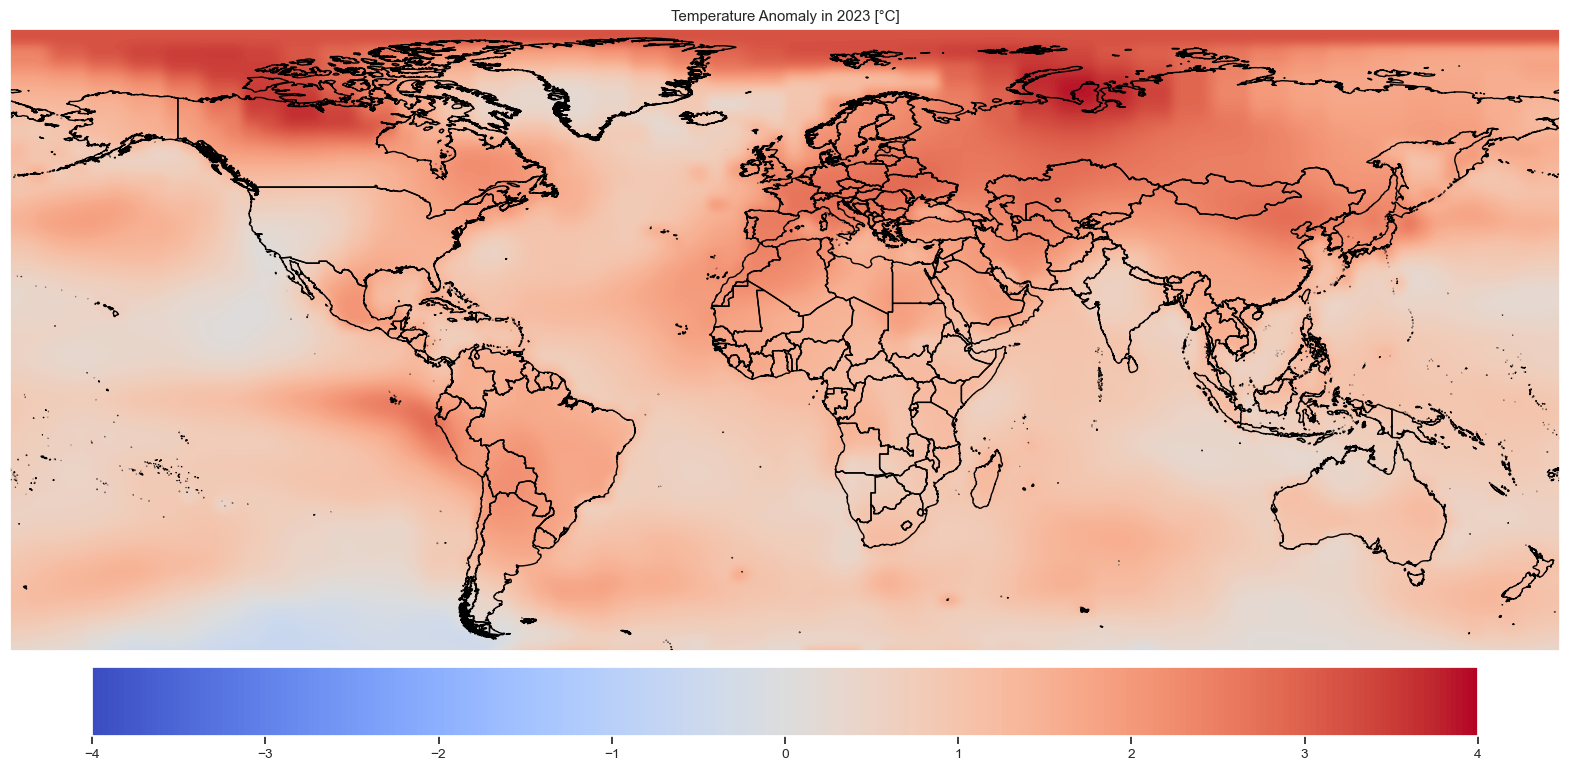

In [16]:
# Resample the data to get annual mean values
climate = xr_df.resample(time='Y').mean()

# Extract the temperature anomaly for each year
anomaly = climate['tempanomaly']

# Set up colorbar properties
cbar_kwargs = {
    'orientation': 'horizontal',
    'fraction': 0.045,
    'pad': 0.01,
    'extend': 'neither'
}

# Create a figure and axis for plotting
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Add country borders to the map
ax.add_feature(NaturalEarthFeature('cultural', 'admin_0_countries', '10m'),
               facecolor='none', edgecolor='black')

# Set the geographical extent of the map
ax.set_extent([-150, 150, -55, 85])

# Set initial index to -1 (last year in the dataset)
i = -1

# Extract the date from the anomaly data
date = pd.to_datetime(anomaly.isel(time=i)['time'].values)

# Set the title for the plot
ax.set_title("Temperature Anomaly in " + str(date.year) + " [°C]")

# Plot the temperature anomaly for the specified year
anomaly.isel(time=i).plot.imshow(ax=ax, add_labels=False, add_colorbar=True,
                                 vmin=-4, vmax=4, cmap='coolwarm',
                                 cbar_kwargs=cbar_kwargs, interpolation='bicubic')

# Save the plot as a static image
plt.savefig("global_map.png", bbox_inches='tight', dpi=150)

# Display the plot
plt.show()
